In [8]:
using LinearAlgebra

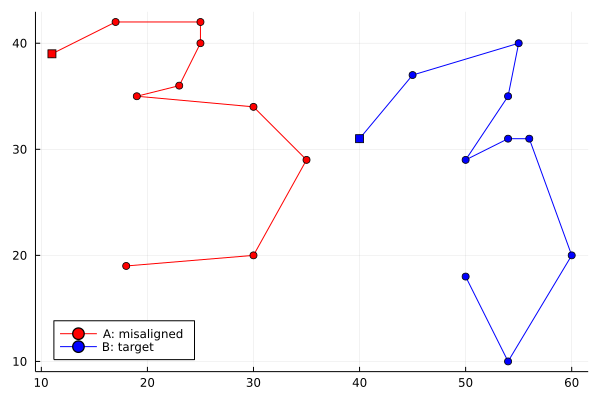

In [18]:
using Plots
function reader(url::String, T::DataType, dims::Dims)
data = Array{T}(undef, dims)
read!(download(url), data)
return data
end
if !@isdefined(data) # load data if needed (needs web access)
url = "http://web.eecs.umich.edu/~fessler/course/551/data/digits/"
files = ["digit1a2x10int16.dat", "digit1b2x10int16.dat",
"digit2a2x10int16.dat", "digit2b2x10int16.dat"]
data = [reader(url * file, Int16, (2,10)) for file in files]
end
A = data[1]; B = data[2] # dataset 1
#A = data[3]; B = data[4] # dataset 2
# plot points with first point marked for clarity
plot(legend=:bottomleft, aspect_ratio=:equal)
plot!(A[1,:], A[2,:], color=:red, marker=:circle, label="A: misaligned")
plot!(B[1,:], B[2,:], color=:blue, marker=:circle, label="B: target")
scatter!([A[1,1]], [A[2,1]], color=:red, marker=:square, label="")
scatter!([B[1,1]], [B[2,1]], color=:blue, marker=:square, label="")

In [15]:
"""
Aa = procrustes(B, A ; center::Bool=true, scale::Bool=true)
In:
* `B` and `A` are `d × n` matrices
Option:
* `center=true/false` : consider centroids?
* `scale=true/false` : optimize alpha or leave scale as 1?
Your solution needs only to consider the defaults for these.
Out:
* `Aa` `d × n` matrix containing `A` Procrustes−aligned to `B`
Returns `Aa = alpha * Q * (A − muA) + muB`, where `muB` and `muA` are
the `d × n` matrices whose rows contain copies of the centroids of
`B` and `A`, and `alpha` (scalar) and `Q` (`d × d` orthogonal matrix) are
the solutions to the Procrustes + centering / scaling problem
`\\argmin_{alpha, muA, muB, Q: Q'Q = I} \\| (B − muB) − alpha * Q (A − muA) \\|_F`
"""
function procrustes(B, A ; center::Bool=true, scale::Bool=true)
    n1 = size(A)[2]
    n2 = size(B)[2]
   
    
    muA = 1/n2 * A * ones(n1)
    muB = 1/n1 * B * ones(n2)
    
    A0 = A .- muA
    B0 = B .- muB
    
    U, s, V = svd(B0 * A0')
    Q = U * V'
    
    alpha = tr(B0 * A0' * Q') / tr(A0 * A0')
    
    Aa = alpha * Q * (A .- muA) .+ muB
    return Aa
end

procrustes

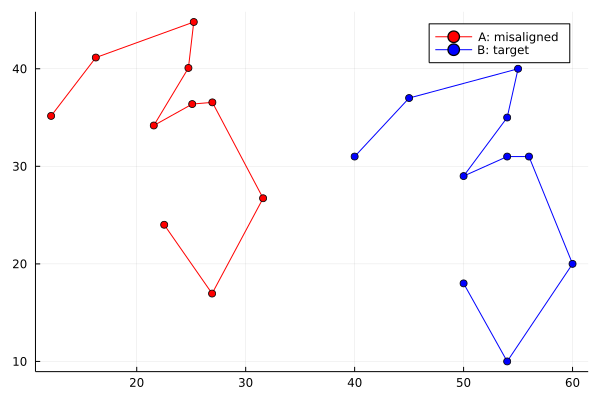

In [19]:
Aa = procrustes(A, B)
plot(Aa[1,:], Aa[2,:], color=:red, marker=:circle, label="A: misaligned")
plot!(B[1,:], B[2,:], color=:blue, marker=:circle, label="B: target")

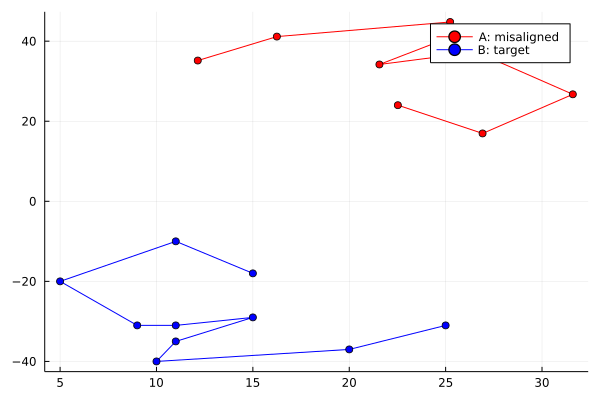

In [17]:
Aa = procrustes(A, B)
plot(Aa[1,:], Aa[2,:], color=:red, marker=:circle, label="A: misaligned")
plot!(B[1,:], B[2,:], color=:blue, marker=:circle, label="B: target")